# Question to be asked before starting working with data

## 1. Business Objective, End-Goal and benefits?
Say for eg if we build a accurate model which predicts the price of a house fairly accurate and for a given house our model predicts a price as 10cr but its available at 3cr then we can buy that house and later sell that house at a higher price and gain the profit , ie invest in undervalued area to gain profit..

## 2. Current Scenerio or situation
Means how this are done at current situation and what is the error rate in current situation and how much error rate can be decreased using ml model

## 3. Finding the model type to build
i.e. 1. Supervised, Unsupervised or Reinforcement Learning
2. Classification or regression
3. Batch or online learning
#### Batch Learning - Data phele se hai aur uspe model build kia...e.g Price Prediction
#### Online Learning - Data kahin se ata ja rha ha aur uske basis pe predictions hti rehti h   e.g Span Prediction 

## 3. Performance Metric
For regression a typical metric is RMSE(root mean square value) others inclued MAE(mean absolute error), Manhattan Norm etc but RMSE is mostly preferred.

## 4. Checking the Assumptions
Means you have to fully check what you are building i.e say we want to know the price of a particular house but in reality we  just want to classify the house as cheap or expensive.

Step 1. Reading data using pandas 

In [1]:
import pandas as pd 
housing=pd.read_csv("HousingData.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

Step 2. Getting information about the data

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


#### No missing values

DataTypes Present
CHAS and RAD are categorical Data's and rest are Float values

it would be feasible if somehow get to know the different types of values present inside a categorical feature

In [3]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [4]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. Count- number of data-value present
2. mean- average 
3. std- means se kitni disperse ha value..kitni faili hui h
4. min- lowest value
5. 25%- 25th percentile..means 25% of data is less than or equal to 0.082045 
6. 50%- 50th percentile..means 50% of data is less than or equal to 0.256510
7. 75%- 75th percentile..means 75% of data is less than or equal to 3.677082
8. max- maximun value or highest value

In [6]:
%matplotlib inline 

In [7]:
import matplotlib.pyplot as plt

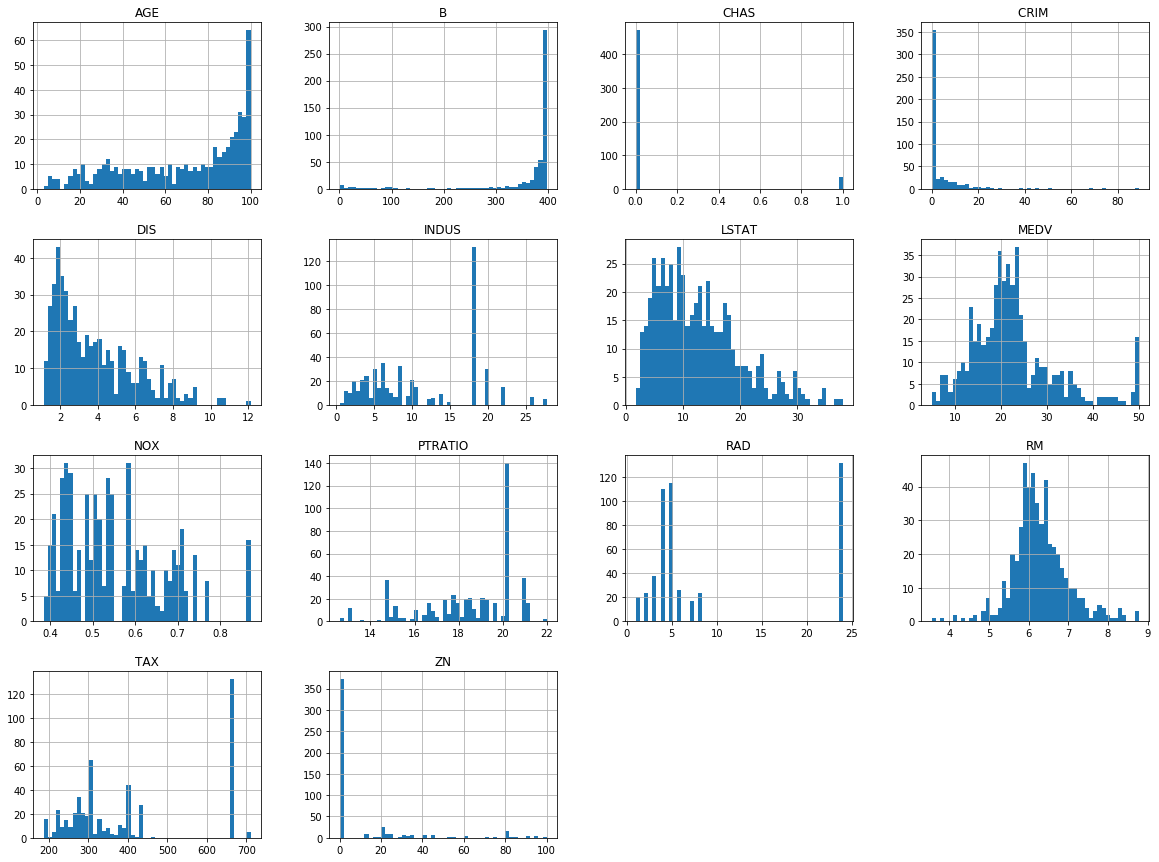

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Getting the histogram plot of every features

eg.  age feature takes... we observe that the age with more than 100 has count of more  than 60 times

Step 3 .Splitting Data into train-test splitting 

In [ ]:
## Creating a function to split it into training and testing data
##import numpy as np
"""def test_train_split(data, test_ratio):
    This function splits our data based on the test_ration provided
    splitting is done using numpy's random.permutation function
    test_ratio = amount of data you want as test data i.e 0.2 or 0.3 etc
    data= the data you want to split into test and train
    retruns the test and train data
    np.random.seed(5)
    shuffled = np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]"""

In [27]:
"""train_data , test_data = test_train_split(housing,0.2)"""

In [28]:
"""print(f"shape of our training data: {train_data.shape}\n and test data: {test_data.shape}\n ")"""

shape of our training data: (405, 14)
 and test data: (101, 14)
 


# Note
a better approach to splitting a data into test train is to use seed..
why we we want to use seed
if we didnt use seed then every time we run our test_train_split function it will generate random numbers and in the longer run our model may encounter values of test data also and that we dont want ; so we use something as seed this will generate every time the same set of random numbers

We can also use scikit-learn train_test_split function which saves us from writting this function

In [22]:
X=housing.drop(["MEDV"], axis=1)
print(X.head())
y=housing["MEDV"]
print(y.head())

     CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 ,stratify=housing["CHAS"]  ,random_state=4)

In [29]:
print("training data")
print(f"shape features :{X_train.shape}\n and labels {y_train.shape}\n ")
print(f"features :{X_train.columns}\n and labels {y_train.name} ")

training data
shape features :(404, 13)
 and labels (404,)
 
features :Index(['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
 and labels MEDV 


In [28]:
print("test data")
print(f"shape features :{X_test.shape}\n and labels {y_test.shape}\n ")
print(f"features :{X_test.columns}\n and labels {y_test.name} ")

test data
shape features :(102, 13)
 and labels (102,)
 
features :Index(['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
 and labels MEDV 


arugements in train_test_split function of scikit
1. data we want to split
2. test_size = ratio in which data is to split.. 0.2 or 20% as test and rest as train
3. random_state= random.seed
4. stratify - it means taking an example of CHAS feature it has majority of data as 0 values and suppose during a split we got all the 1 values in test data and none in train data and therefore when it encounters 1 during test it will give wrong prediction since it havent seen 1 in training data...so what stratify does it split the data into training and testing in the same ratio as they are present

In [30]:
X_train['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [31]:
X_test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

We can notice that both train and test have same ratio of o and 1 values

Step 4. Finding Correlations
increasing a certain value wether the value increases or not is found by find the correlation between them
increases towards 1 strong positive (directly proportional)
increases towards -1 strong negative (indirectly proportional)

In [32]:
corr_mat=housing.corr() #find the correlation matrix of a our housing data 
print(type(corr_mat)) #return value will also be a dataframe so we wan applyu all the function we have for pandas df

<class 'pandas.core.frame.DataFrame'>


In [33]:
corr_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### above values shows descending order of collinearilty with our predictor value

for e.g rm has a strong correlation with the medv value i,e as the rm increases medv also increase

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C5AE52B00>,
      dtype=object)

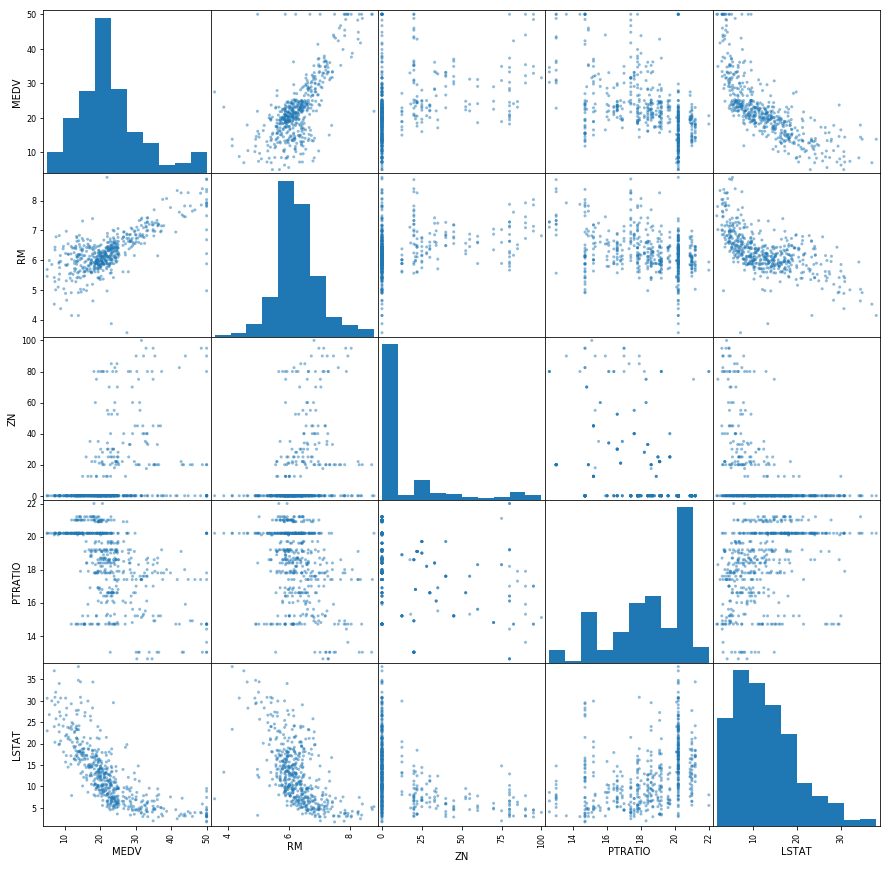

In [34]:
from pandas.plotting import scatter_matrix ## imported scatter_matrix to plot correlationm matrix of desired attrubutesas
attr=["MEDV", "RM", "ZN", "PTRATIO", "LSTAT"] ##attribues which we want to see the correlation with medv
scatter_matrix(housing[attr], figsize=(15,15))


By observing the above plot we can see that we have two attributes which can further investigate
i.e RM and LSTAT, so now lets investigate them to gain further insight

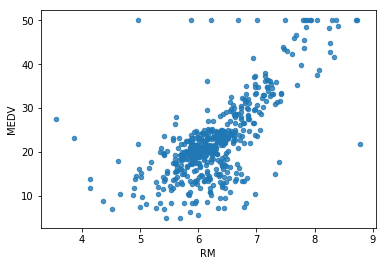

In [35]:
# RM
housing.plot(kind ="scatter", x='RM', y="MEDV",alpha=0.8) #alpha means the points will be dark for higher density value

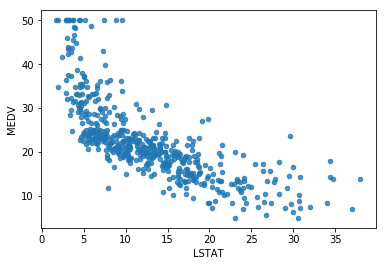

In [36]:
# RM
housing.plot(kind ="scatter", x='LSTAT', y="MEDV",alpha=0.8) #alpha means the points will be dark for higher density value

## Feature Engineering
We can try out different attributes together to enhance the prediction of a model , it largely depends on domain knowledge

In [37]:
housing["TPRM"]= housing["TAX"]/housing["RM"]
housing["TPRM"].head()

0    45.019011
1    37.688834
2    33.681280
3    31.723350
4    31.061984
Name: TPRM, dtype: float64

In [38]:
#Let's see how it is correlated with our output label
corr_mat=housing.corr() #find the correlation matrix of a our housing data 
corr_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TPRM      -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

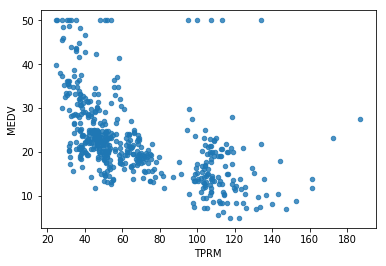

In [39]:
# TPRM
housing.plot(kind ="scatter", x='TPRM', y="MEDV",alpha=0.8) #alpha means the points will be dark for higher density value

# Step 4 . Handling Missing Data

### To handle missing data we have three options 
 
 ##### 1 . To get rid of the missing values - since we have only 506 datapoints we can't afford to remove any data... housing.dropna(subset=["RM"] , inplace= True)
 
 
 ##### 2.  To remove the whole feature or attribute - it  depends how important our feature is.. suppose we have missing valaue from CHAS feature which it have strong relationship with our target variable so we can't afford to remove that  feature housing.drop("RM" ,axis=1, inplace= True)
 
 
 ##### 3. To replace it with some values say 0 , mean or median- better to replace it with the mean value since its a continuous value if its a categorical value we would have replace it with the mode... med = housing["RM"].median() ---> housing["RM"].fillna(med)

In [40]:
## Imputation is handled by scikit-learn library so that during test we didnt have to do this process againabs
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [41]:
imputer.statistics_ #values calculated for each column ie median values

array([2.68880e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19400e+00, 7.65000e+01, 3.27590e+00, 5.00000e+00, 3.30000e+02,
       1.90000e+01, 3.92045e+02, 1.15600e+01])

In [44]:
## now we will fit this value so that in future when we encounter any missing value from any column 
## imputer will impute will it with median value

X=imputer.transform(X_train) #returns a numpy array 

X_tr=pd.DataFrame(X, columns= X_train.columns)



In [45]:
X_tr.describe() #returns a dataframe after imputing it with median values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616481,11.382426,11.105619,0.069307,0.552851,6.274594,68.245050,3.841509,9.569307,408.913366,18.469554,357.108317,12.768589
std,8.689347,23.407156,6.772653,0.254290,0.114363,0.685689,28.388214,2.117053,8.674291,166.561831,2.138223,91.958769,7.174085
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080050,0.000000,5.190000,0.000000,0.448750,5.875750,43.625000,2.110500,4.000000,284.000000,17.400000,376.462500,7.215000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.194000,76.500000,3.275900,5.000000,330.000000,19.000000,392.045000,11.560000
75%,3.674807,12.500000,18.100000,0.000000,0.624000,6.621500,94.100000,5.287300,24.000000,666.000000,20.200000,396.097500,17.152500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-Learn Design

Scikit-Learn is a frame which basically have three objects

1. Estimators : Estimates some parameters based on the dataset. For eg Imputer
It has fit method and can also have transform method

Fit- estimates or learns the paramters from the dataset

2. Transformers : Transforms the data based on the learnings from the fit method
You can do transform after fit or; directly call for fit_tansform method.
fit_transform is faster than fit and transform because its optimized for that method only

3. Predictors- ML algorithms are an example of predictors. It first fits i.e learns and then predicts therefore it has fit() method and predict() method. It also have score() function to evaluate the performance of the predictions

## Feature Scaling
our model performance enhances when our numerical features our on the same scale
So primarily we have two methods for feature scaling
1. Min-Max(Normalization) Scaling : (value-min)/(max-min)
values ranges from 0-1 after this method
with the help of scikit learn we can achieve this simply by writting 
#### from sklearn.preprocessing import MinMaxScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


2. Standardization : (value-mean)/ (std)
Standardize features by removing the mean and scaling to unit variance
#### from sklearn.preprocessing import StandardScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

Generally Standardization proves to be a better approach then normalization

# Pipeline Creation
pipeline is a series of steps that automate the model building process

pipeline should include all the steps like handling missing value column standardization etc

In [47]:
from sklearn.pipeline import Pipeline #importing pipeline
from sklearn.preprocessing import StandardScaler #importing standardscalar 
#other scikit libraries to be imported as per use

my_pipeline= Pipeline([
    ('Imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [48]:
housing_tr=my_pipeline.fit_transform(X_train) # we have to pass the feature values only

In [49]:
housing_tr

array([[ 3.92292215, -0.48688269,  1.03401929, ...,  0.81029478,
        -3.6832569 ,  0.2444329 ],
       [-0.40905981, -0.48688269, -1.04307239, ..., -0.87543363,
         0.37194975, -0.81624912],
       [ 0.00658967, -0.48688269,  1.03401929, ...,  0.81029478,
         0.34309676, -0.30544699],
       ...,
       [-0.40365917,  0.79636581, -0.91297697, ..., -0.87543363,
         0.37173199, -0.19379625],
       [ 0.3573438 , -0.48688269,  1.03401929, ...,  0.81029478,
        -3.88468346,  0.65195809],
       [-0.40912204, -0.48688269, -1.27813117, ..., -0.31352416,
         0.41865894, -0.72692852]])

fit_transform returns an array not a dataframe... because our predictors work on numpy array not on dataframe

In [50]:
print(f"type: {type(housing_tr)}\n shape:{housing_tr.shape}")

type: <class 'numpy.ndarray'>
 shape:(404, 13)


## Model Selection

We will not split our data into features and labels
it is advisable to do this process before train_test_split

In [53]:
#X_train=housing_tr[0:,0:13]
#X_train.shape

In [52]:
#y_train=housing_tr[0:,-1]
#y_train.shape

In [51]:
#y_train

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
# testing our pipeline using some training data

some_data_X=housing_tr[5:10:,0:13]
some_data_y=housing_tr[5:10:,-1]

In [56]:
pipeline_prepared = my_pipeline.transform(some_data_X)

In [57]:
model.predict(pipeline_prepared) #these are predcicions made by our model

array([-49.67768681,  26.3894052 ,  38.42987726, 219.48187478,
        28.77779289])

In [58]:
some_data_y

array([ 0.19000316, -1.54058328,  1.76427857, -0.05144156,  0.9785365 ])

# Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
housing_predictions= model.predict(X_train)

In [62]:
import numpy as np
err_mse = mean_squared_error(y_train , housing_predictions)
err_rmse = np.sqrt(err_mse)

In [66]:
print(f"mean square error : {err_mse}\nroot mean square error :{err_rmse}")

mean square error : 20.999573734119153
root mean square error :4.582529185299222


## To have a better evaluation of a model we will use cross-validation

In [67]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model , X_train , y_train, scoring= "neg_mean_squared_error", cv=5)
rmse_score= np.sqrt(-score) #we use -score becuase in score we caluculated neag mean square error

In [68]:
rmse_score

array([4.78610263, 4.29985039, 5.54286046, 4.24098272, 5.09496766])

# Saving the model

In [94]:
!pip install joblib

In [95]:
from joblib import load , dump

In [97]:
dump(model, "project1.joblib")

['project1.joblib']

# Testing out Model

In [69]:
## Load our model
## https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/ 
import joblib
model = joblib.load("project1.joblib")

In [70]:
X_test_prepared= my_pipeline.transform(X_test)
test_predictions = model.predict(X_test_prepared)
test_mse= mean_squared_error(y_test,test_predictions)
test_rmse= np.sqrt(test_mse)

In [73]:
print(f"mean square error :{test_mse}\nroot mean squared:{test_rmse}")

mean square error :604.11680721987
root mean squared:24.5787877491928


# We have a root mean squared error of 24.5 we can try different models and make a report how they are performing on train and test data and can fine tune our model according



## We can adopt certain things to enhance the performance of our model like hyperparameter tuning etc 